<a href="https://colab.research.google.com/github/antosomzi/Projet_AAA_ARHOUL_REVEL/blob/espace-travail-Antoine/Copie_de_Projet_AAA_ARHOUL_REVEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

The classification goal is to predict if the client will subscribe a term deposit (variable y).

colonnes :

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign: 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

other attributes: 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

output variable (desired target): 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA



In [3]:
marketing = fetch_openml('bank-marketing', version=1, parser='auto',as_frame=True)




In [4]:
X, y = marketing.data, marketing.target

# **Data Exploratory Analysis**

In [5]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [6]:
print(y)
y.info()

0        1
1        1
2        1
3        1
4        1
        ..
45206    2
45207    2
45208    2
45209    1
45210    1
Name: Class, Length: 45211, dtype: category
Categories (2, object): ['1', '2']
<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: Class
Non-Null Count  Dtype   
--------------  -----   
45211 non-null  category
dtypes: category(1)
memory usage: 44.4 KB


We can change all the '1' into 'no' (no subsribtion) et all the '2' into 'yes' (subscribtion)
We can also change column names to facilitate understanding

In [7]:
y=y.replace({'1': 'no', '2': 'yes'})
nouveaux_noms = ['age', 'job','marital','education','default','balance','housing', 'loan', 'contact', 'day','month','duration', 'campaign','pdays','previous','poutcome']
X.columns = nouveaux_noms

In [8]:
X.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


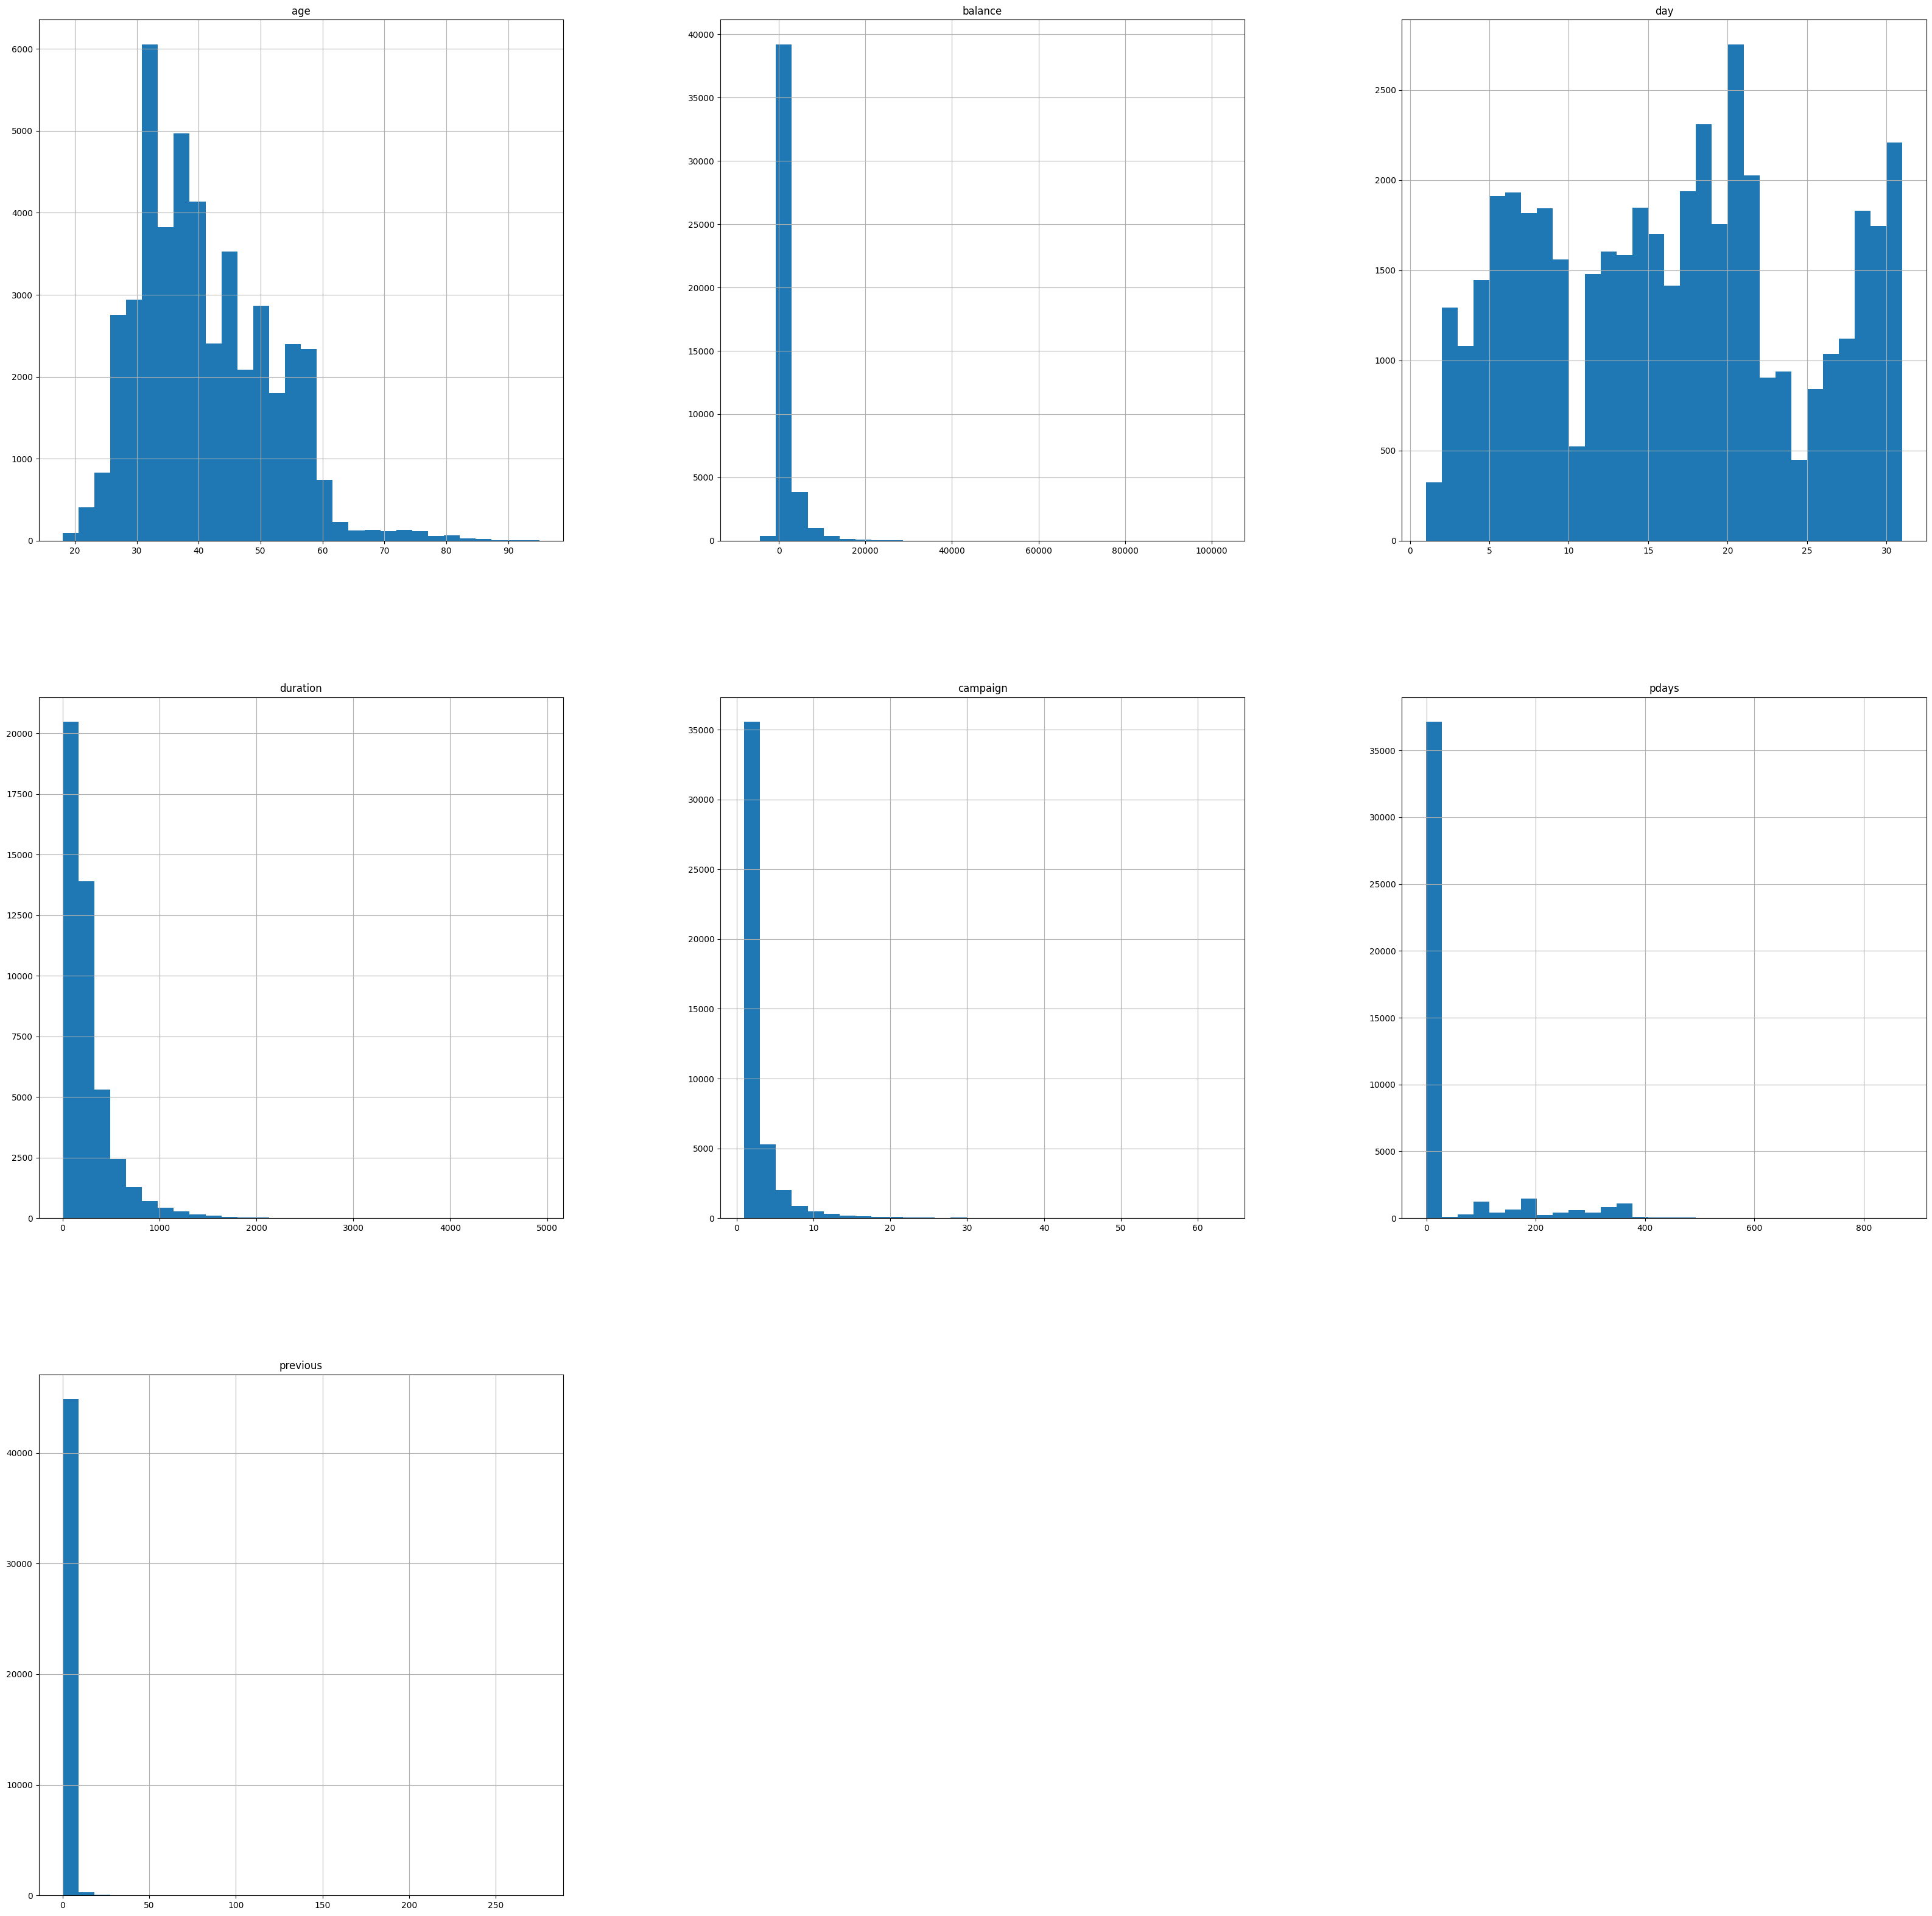

In [ ]:
X.hist(bins=30,figsize=(40,40))
plt.show()

Il y a 7 numérical features


In [9]:
numerical_features=['age','balance','day','duration','campaign','pdays','previous']

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
dtypes: category(9), int64(7)
memory usage: 2.8 MB


Aucune missing feature

In [11]:
X.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


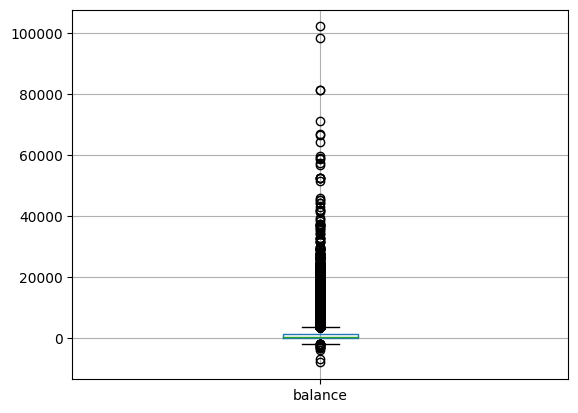

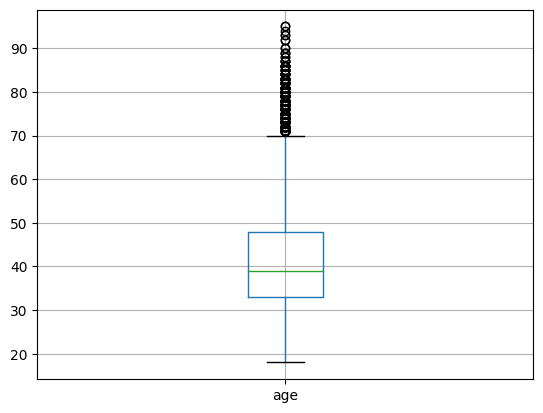

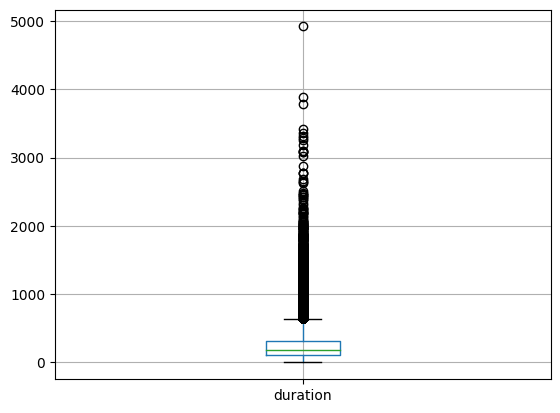

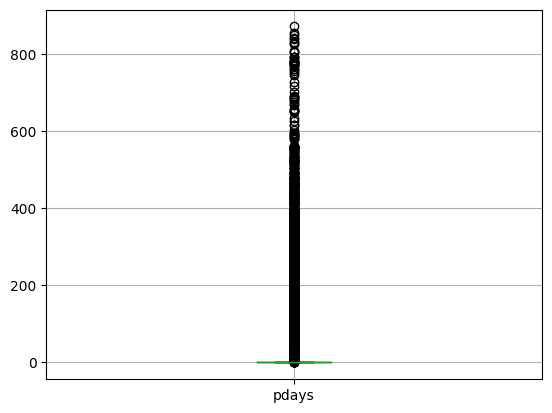

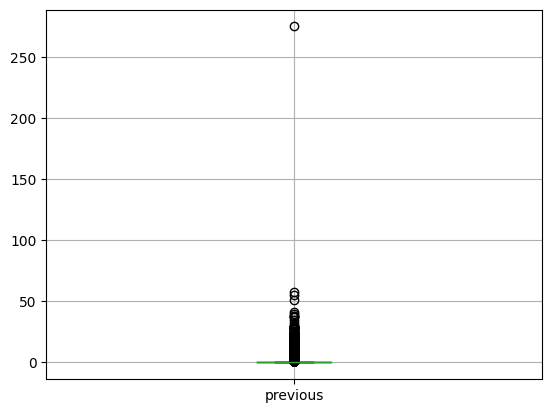

In [12]:
columns=['balance','age','duration','pdays','previous']
for i in columns:
  plt.figure()
  X.boxplot(column=i)



On remarque que la trés grande majorité des clients n'ont jamais été contacté auparavant

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


<ipython-input-13-165da3744ebf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


<Axes: >

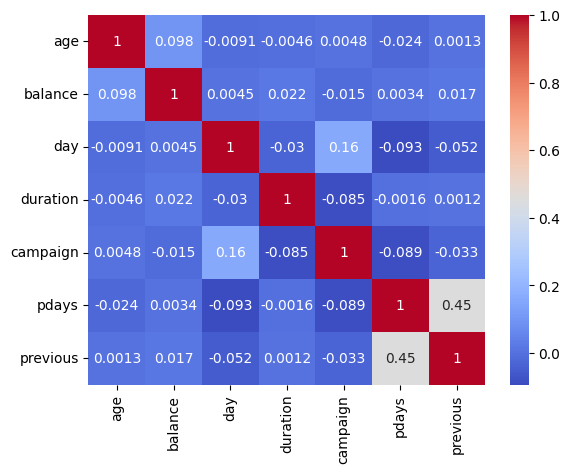

In [13]:
correlation_matrix = X.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')



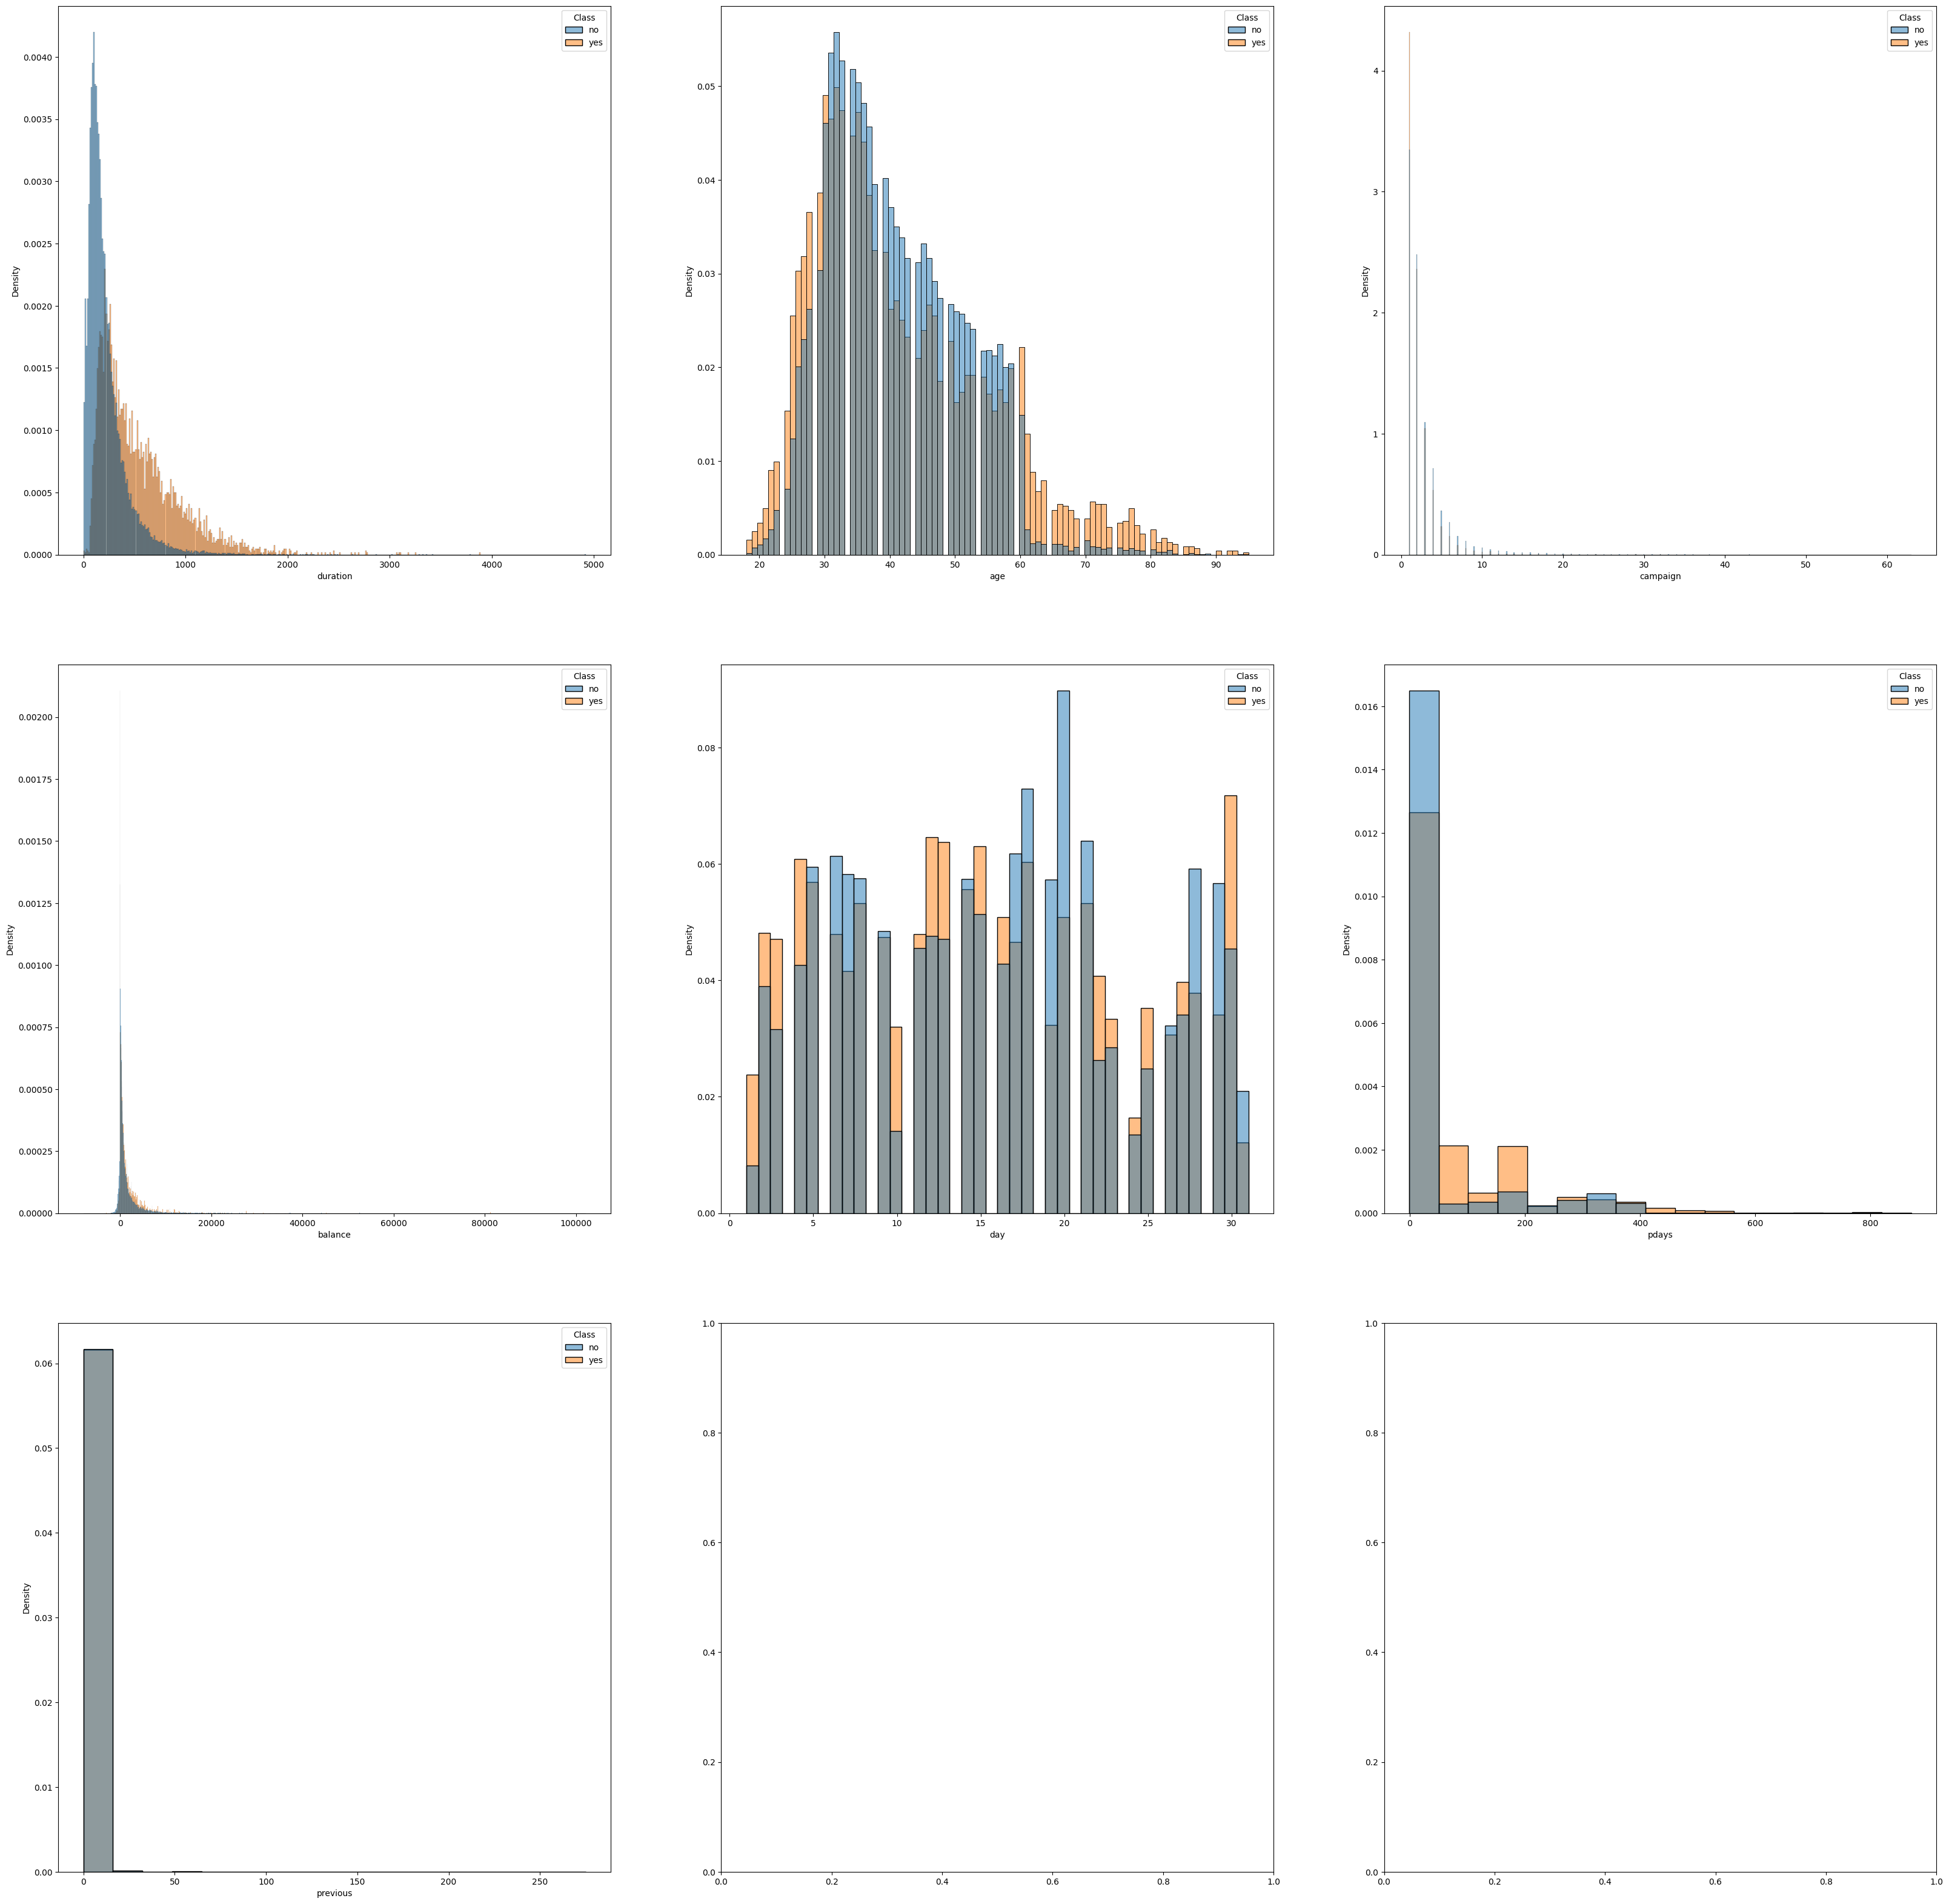

In [14]:

fig, axs = plt.subplots(3, 3, figsize=(40, 40))  # Ajustez figsize selon vos besoins


sns.histplot(data=X, x='duration', hue=y, stat="density", common_norm=False,ax=axs[0,0])
sns.histplot(data=X, x='age', hue=y, stat="density", common_norm=False,ax=axs[0,1])
sns.histplot(data=X, x='campaign', hue=y, stat="density", common_norm=False,ax=axs[0,2])
sns.histplot(data=X, x='balance', hue=y, stat="density", common_norm=False,ax=axs[1,0])
sns.histplot(data=X, x='day', hue=y, stat="density", common_norm=False, ax=axs[1,1])
sns.histplot(data=X, x='pdays', hue=y, stat="density", common_norm=False,ax=axs[1,2])
sns.histplot(data=X, x='previous', hue=y, stat="density", common_norm=False,ax=axs[2,0])
plt.show()



On remarque que la colonne "duration" permet de distinguer une tendance assez net car on a assez peu de chevauchement entre les "yes" et "no". De meme pour la colonne balance
Avec l'histogramme de la colonne age, on remarque qu'a partir d'un certain age, on a un taux de "yes" trés supérieur mais cela concerne peu de personne.

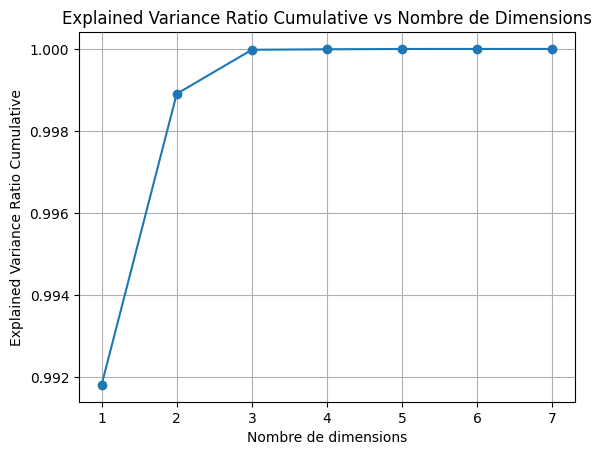

        age   balance       day  duration  campaign     pdays  previous
0  0.000341  0.999998  0.000012  0.001837 -0.000015  0.000113  0.000013
1 -0.000280 -0.001837 -0.000980  0.999997 -0.001014 -0.000749  0.000006
2 -0.002584 -0.000114 -0.007793  0.000738 -0.002751  0.999907  0.010465
3  0.999689 -0.000341 -0.024697  0.000257  0.000168  0.002365  0.002486
4  0.024618 -0.000023  0.997496  0.001057  0.065747  0.008045 -0.002541
5 -0.001829  0.000014 -0.065702  0.000948  0.997744  0.002087  0.013463
6 -0.002371 -0.000011  0.003563 -0.000025 -0.013239 -0.010480  0.999848


In [19]:
# Appliquer PCA
pca = PCA()
X_num = X[numerical_features]

X_pca = pca.fit_transform(X_num)

# Calculer l'explication de la variance cumulative
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Tracer la courbe de l'explication de la variance en fonction du nombre de dimensions
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Nombre de dimensions')
plt.ylabel('Explained Variance Ratio Cumulative')
plt.title('Explained Variance Ratio Cumulative vs Nombre de Dimensions')
plt.grid(True)
plt.show()
# Supposons que pca soit votre objet PCA
components = pca.components_
components_df = pd.DataFrame(components, columns=numerical_features)
print(components_df)

On remarque que la variance atteint 1 à partir de 3 dimensions, on peut en déduire que certaines dimensions apportent peu d'information.
En regardant le poid des features dans les dimensions, on remarque que si on prit en compte les features balance, duration et pdays, alors les features ages, day, campaign et previous modifient peu la variance.
Cela confirme que les colonnes campagn, day et previous ne nous apportent que trés peu d'info ( Cela est visible dans les autres graphs qui ont été fait)

Il faudra faire attention à bien prendre data set équilibré avec environ 17/100 de yes en target car assez déséquiliber, risque qu'on est par exemple que 1/100  de yes et alors la dure d'entrainer notre modèle sur 1/100.